In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

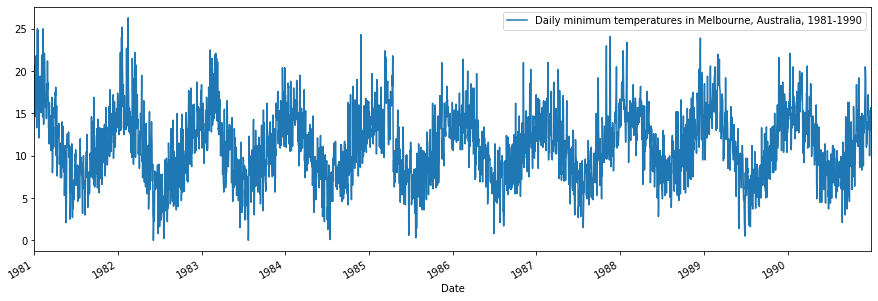

In [2]:
path = ("https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv")

df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15,5));


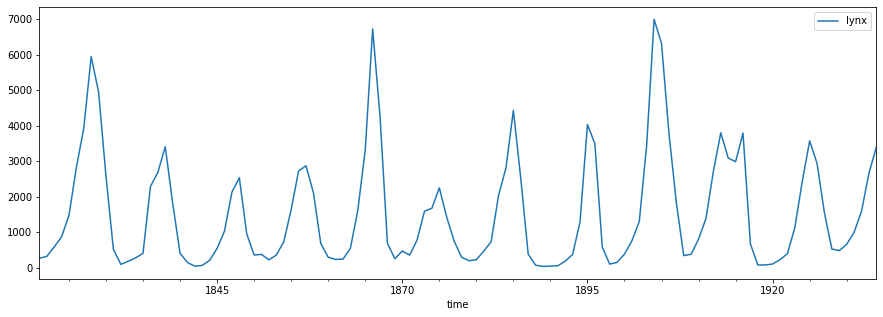

In [3]:
path = ("https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv")

df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df.plot(figsize=(15,5));

In [4]:
path = ("https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv")

df = pd.read_csv(path)

In [5]:
df['date'] = df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

df[['date']].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null object
dtypes: object(1)
memory usage: 18.2+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'])
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.2 KB


In [7]:
df.index = df['date']

In [8]:
df.index = pd.to_datetime(df[['year', 'month', 'day']])

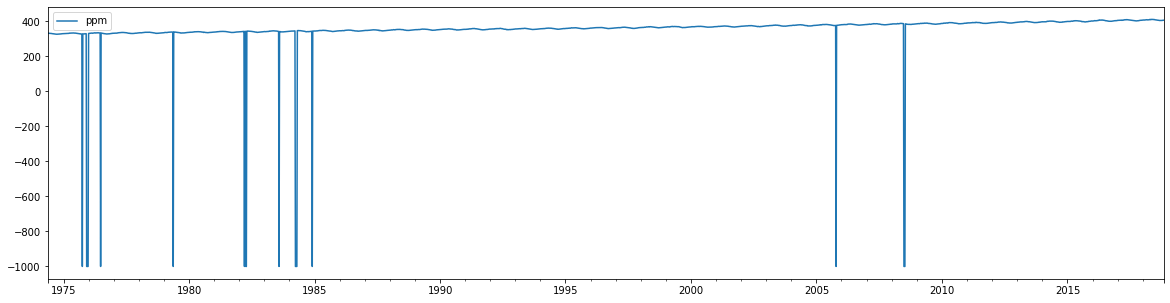

In [9]:
df[['ppm']].plot(figsize=(20,5));

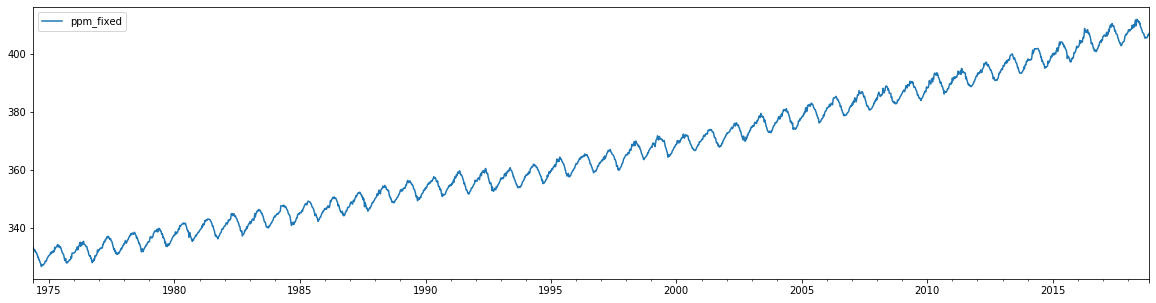

In [10]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x <0 else x).fillna( method='backfill')
df[['ppm_fixed']].plot(figsize=(20,5));

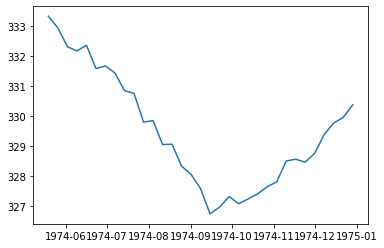

In [11]:
df1974 = df[df.year == 1974]

plt.plot(df1974.index, df1974['ppm_fixed'])

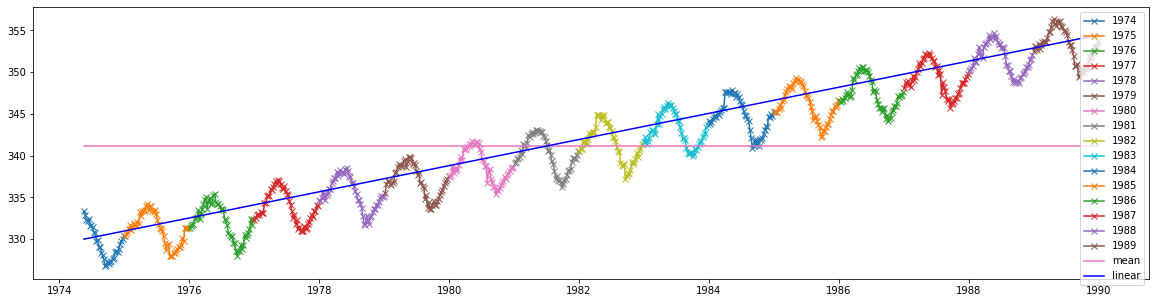

In [20]:
plt.figure(figsize=(20,5))
for year in range(1974, 1990):
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'x-', label = year)
    
df_all_years = df[(df.year>=1974) & (df.year<1990)]

def linear_func(ppm_fixed, k=None, b=0):
    mean_value = np.mean(ppm_fixed)
    if k is None:
        return [mean_value] * len(ppm_fixed)
    
    return [idx*k+b for idx, _ in enumerate(ppm_fixed)]

plt.plot(df_all_years.index, linear_func(df_all_years.ppm_fixed), '-', label='mean');
plt.plot( df_all_years.index, linear_func(df_all_years.ppm_fixed, k=0.03, b=330), c='b', label='linear');
    
plt.legend();

In [21]:

print('mean',mae( df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed)))
print('linear',mae( df_all_years.ppm_fixed, linear_func(df_all_years.ppm_fixed, k=0.03, b=330)))


mean 6.2368150771337945
linear 2.0195710784313725
